In [57]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [58]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [59]:
print('training data shape',x_train.shape)
print('training label shape',y_train.shape)
print('test data shape',x_test.shape)
print('test label shape',y_test.shape)


training data shape (60000, 28, 28)
training label shape (60000,)
test data shape (10000, 28, 28)
test label shape (10000,)


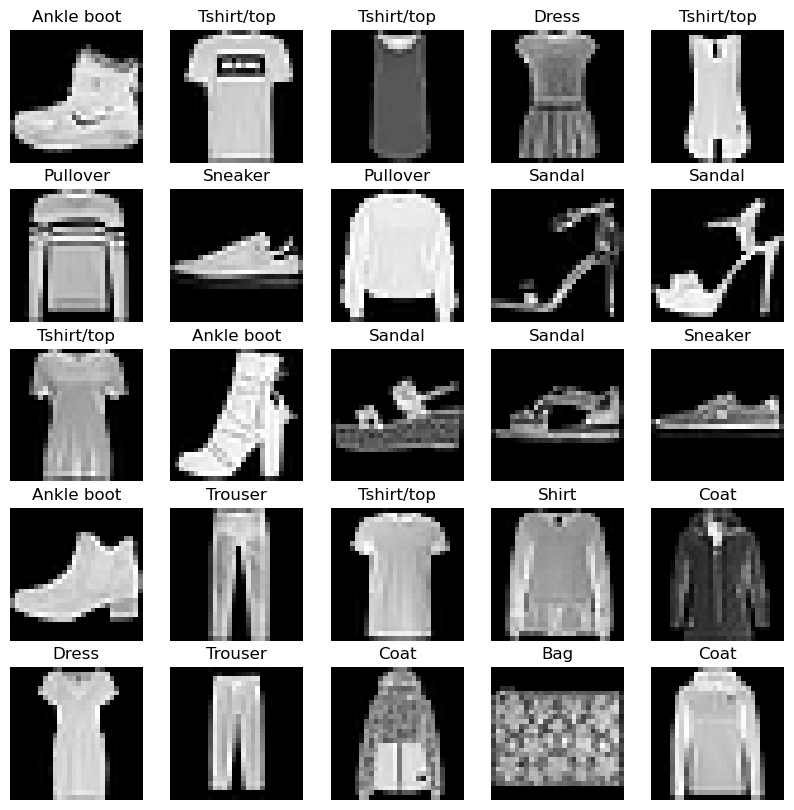

In [60]:
class_labels=['Tshirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i] , cmap='gray')
    plt.title(class_labels[y_train[i]])
    plt.axis('off')
plt.show()

In [61]:
x_train=x_train/255
x_test=x_test/255
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)


In [62]:
model=Sequential()
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │       1,384,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,386,506 (5.29 MB)

 Trainable params: 1,386,506 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
his=model.fit(x_train,y_train,batch_size=128,epochs=10,validation_split=0.2)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.7814 - loss: 0.6313 - val_accuracy: 0.8814 - val_loss: 0.3389
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 43ms/step - accuracy: 0.8884 - loss: 0.3149 - val_accuracy: 0.8857 - val_loss: 0.3116
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.9074 - loss: 0.2616 - val_accuracy: 0.9014 - val_loss: 0.2740
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.9175 - loss: 0.2268 - val_accuracy: 0.9118 - val_loss: 0.2524
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.9264 - loss: 0.2039 - val_accuracy: 0.9101 - val_loss: 0.2489
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.9347 - loss: 0.1793 - val_accuracy: 0.9106 - val_loss: 0.2484
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - accuracy: 0.9389 - loss: 0.1660 - val_accuracy: 0.9160 - val_loss: 0.2406
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.9471 - loss: 0.1467 - 

In [37]:
test_accuracy=model.evaluate(x_test,y_test)
print(test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1001 - loss: 31160.2539
[31054.021484375, 0.10000000149011612]
